<a href="https://colab.research.google.com/github/AnkeethaJha-99/DS_projects/blob/main/KNN_Regressor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from math import sqrt
from sklearn import neighbors
from sklearn.model_selection import train_test_split
import pandas as pd

In [9]:
df = pd.read_csv('Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [10]:
df.drop(['Species'], axis=1, inplace=True)

df

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


In [11]:
# Model Training
train, test = train_test_split(df, test_size=0.3,random_state=42)
x_train = train.drop('Weight', axis=1)
y_train = train['Weight']
x_test = test.drop('Weight', axis=1)
y_test = test['Weight']

In [12]:
%matplotlib inline

# Model Testing
rmse_val = []
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors=K)

    # Model Fitting
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test, pred))
    rmse_val.append(error)
    print('RMSE value for K = ', K, 'is:', error)

RMSE value for K =  1 is: 68.68206795323896
RMSE value for K =  2 is: 75.83076655454566
RMSE value for K =  3 is: 60.952747902386264
RMSE value for K =  4 is: 86.57992491586893
RMSE value for K =  5 is: 89.55740370473754
RMSE value for K =  6 is: 97.22088726266023
RMSE value for K =  7 is: 99.01438952234666
RMSE value for K =  8 is: 98.59409678689673
RMSE value for K =  9 is: 100.35190322287202
RMSE value for K =  10 is: 104.30274142490217
RMSE value for K =  11 is: 102.06533871872759
RMSE value for K =  12 is: 98.49716746902571
RMSE value for K =  13 is: 101.49454639889746
RMSE value for K =  14 is: 101.73479857488012
RMSE value for K =  15 is: 102.64336178496161
RMSE value for K =  16 is: 107.77288176807909
RMSE value for K =  17 is: 106.69409982346522
RMSE value for K =  18 is: 109.43394405235475
RMSE value for K =  19 is: 110.19921803108666
RMSE value for K =  20 is: 112.5701019226464


<AxesSubplot:>

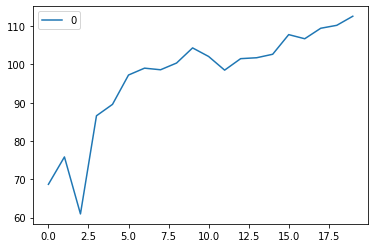

In [13]:
# Plotting RMSE values against value of K
curve = pd.DataFrame(rmse_val)
curve.plot()

In [14]:
# Model Fitting Minimum RMSE
model = neighbors.KNeighborsRegressor(n_neighbors=3)
model.fit(x_train, y_train)
pred = model.predict(x_test)
error = sqrt(mean_squared_error(y_test, pred))
rmse_val.append(error)  # store rmse values
print('RMSE value for K = ', 3, 'is:', error)

RMSE value for K =  3 is: 60.952747902386264


In [15]:
test['predicted weights'] = pred
test

,Weight,Length1,Length2,Length3,Height,Width,predicted weights
78,78.0,16.8,18.7,19.4,5.1992,3.1234,88.333333
155,13.4,11.7,12.4,13.5,2.4300,1.2690,11.400000
128,200.0,30.0,32.3,34.8,5.5680,3.3756,336.666667
55,270.0,23.6,26.0,28.7,8.3804,4.2476,262.333333
94,150.0,21.0,23.0,24.5,5.2185,3.6260,141.666667
29,1000.0,33.5,37.0,42.6,18.9570,6.6030,763.000000
147,7.0,10.1,10.6,11.6,1.7284,1.1484,9.400000
51,180.0,23.6,25.2,27.9,7.0866,3.9060,182.000000
98,188.0,22.6,24.6,26.2,6.7334,4.1658,175.000000
141,1250.0,52.0,56.0,59.7,10.6863,6.9849,1366.666667


In [40]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)

0.9696700062504904